In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = lambda t:np.random.normal(10,3,t)

In [3]:
population = model(30000)
population.shape

(30000,)

In [4]:
observation = population[np.random.randint(0,3000,1000)]
observation.shape

(1000,)

9.966831220732086

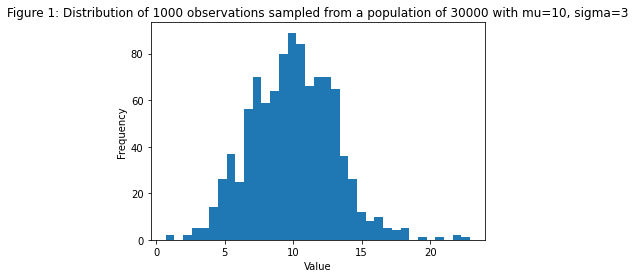

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Figure 1: Distribution of 1000 observations sampled from a population of 30000 with mu=10, sigma=3')
mu_obs = observation.mean()
mu_obs

In [6]:
transition_model = lambda x:[x[0], np.random.normal(x[1], 0.5, (1,))[0]]

In [7]:
def prior(x):
    
    # x[0]=mu, x[1]=sigma
    if x[1] <= 0:
        return 0
    
    return 1

In [8]:
def log_like_normal(x, data):
    return np.sum(-np.log(x[1] * np.sqrt(2*np.pi))-((data-x[0]**2) / (2*x[1]**2)))

In [9]:
def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept = np.random.uniform(0,1)
        return (accept < (np.exp(x_new-x)))

In [10]:
def metropolis_hastings(likelihood, prior, transition_model, param_init, iterations, data, acceptance):
    
    x = param_init
    accepted = []
    rejected = []
    
    for i in range(iterations):
        x_new = transition_model(x)
        x_like = likelihood(x, data)
        x_new_like = likelihood(x_new, data)
        
        if (acceptance(x_like + np.log(prior(x)), x_new_like + np.log(prior(x_new)))):
            x = x_new
            accepted.append(x_new)
            
        else:
            rejected.append(x_new)
            
    return np.array(accepted), np.array(rejected)

In [11]:
accepted, rejected = metropolis_hastings(log_like_normal, prior, transition_model, [mu_obs, 0.1], 50000, observation, acceptance)

/tmp/ipykernel_20244/1185929408.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(x[1] * np.sqrt(2*np.pi))-((data-x[0]**2) / (2*x[1]**2)))
/tmp/ipykernel_20244/71611775.py:12: RuntimeWarning: divide by zero encountered in log
  if (acceptance(x_like + np.log(prior(x)), x_new_like + np.log(prior(x_new)))):


(7, 2)

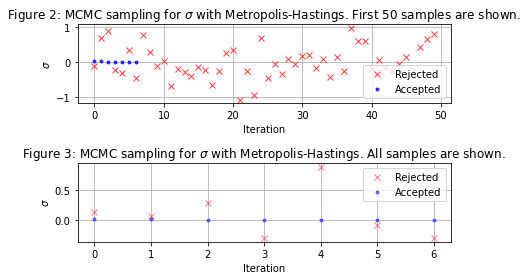

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)

ax1.plot(rejected[0:50,1], 'rx', label='Rejected', alpha=0.75)
ax1.plot(accepted[0:50,1], 'b.', label='Accepted', alpha=0.75)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\sigma$')
ax1.set_title('Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
to_show = -accepted.shape[0]
ax2.plot(rejected[to_show:,1], 'rx', label='Rejected', alpha=0.5)
ax2.plot(accepted[to_show:,1], 'b.', label='Accepted', alpha=0.5)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\sigma$')
ax2.set_title('Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.')
ax2.grid()
ax2.legend()

fig.tight_layout()
accepted.shape